# Walmart Recruiting: Trip Type Classification

<img src="https://tr.investing.com/academy/wp-content/uploads/sites/8/2024/08/walmart.jpg" width="700">

In this project, the goal is to categorize customers' shopping visits into 38 distinct types based on the products they purchased. This is a **multi-class classification problem** where the target variable is `TripType`. The dataset challenges us to build a model that can accurately predict the type of shopping trip.


> **Note:** This project only uses the `train.csv` file, and all predictions are made based on this dataset. The purpose here is solely to build and demonstrate the project, not to create a submission.

---

## Features Description

* `TripType` - The categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting.
* `VisitNumber` - An id corresponding to a single trip by a single customer.
* `Weekday` - The weekday of the trip.
* `Upc` - The UPC number of the product purchased.
* `ScanCount` - The number of the given item that was purchased. A negative value indicates a product return.
* `DepartmentDescription` - A high-level description of the item's department.
* `FinelineNumber` - A more refined category for each of the products.

The dataset was taken from Kaggle:

[Kaggle | Walmart Recruiting: Trip Type Classification](https://www.kaggle.com/competitions/walmart-recruiting-trip-type-classification/overview)

## Data Read

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('train.csv')

## EDA - Exploratory Data Analysis

In [3]:
df.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [4]:
df.tail()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
647049,39,191346,Sunday,3.239000e+10,1,PHARMACY OTC,1118.0
647050,39,191346,Sunday,7.874205e+09,1,FROZEN FOODS,1752.0
647051,39,191346,Sunday,4.072000e+03,1,PRODUCE,4170.0
647052,8,191347,Sunday,4.190008e+09,1,DAIRY,1512.0
647053,8,191347,Sunday,3.800060e+09,1,GROCERY DRY GOODS,3600.0


In [5]:
df.sample(5)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
335113,41,100064,Sunday,7.617132e+09,1,AUTOMOTIVE,252.0
641783,40,190104,Sunday,3.600039e+09,1,HOUSEHOLD PAPER GOODS,3099.0
401288,28,118450,Tuesday,7.874209e+09,1,HOUSEHOLD PAPER GOODS,7010.0
220853,999,65313,Monday,6.076458e+10,-1,MENS WEAR,629.0
573597,43,170915,Thursday,1.820023e+09,1,"LIQUOR,WINE,BEER",1112.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TripType               647054 non-null  int64  
 1   VisitNumber            647054 non-null  int64  
 2   Weekday                647054 non-null  object 
 3   Upc                    642925 non-null  float64
 4   ScanCount              647054 non-null  int64  
 5   DepartmentDescription  645693 non-null  object 
 6   FinelineNumber         642925 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ MB


In [7]:
df.shape

(647054, 7)

In [8]:
df.isnull().sum()

TripType                    0
VisitNumber                 0
Weekday                     0
Upc                      4129
ScanCount                   0
DepartmentDescription    1361
FinelineNumber           4129
dtype: int64

In [9]:
df.duplicated().sum()

5704

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(641350, 7)

In [12]:
df['TripType'].nunique()

38

In [13]:
df['TripType'].value_counts().describe()

count        38.000000
mean      16877.631579
std       30921.087184
min          34.000000
25%        2983.250000
50%        6575.500000
75%       18912.500000
max      173031.000000
Name: count, dtype: float64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

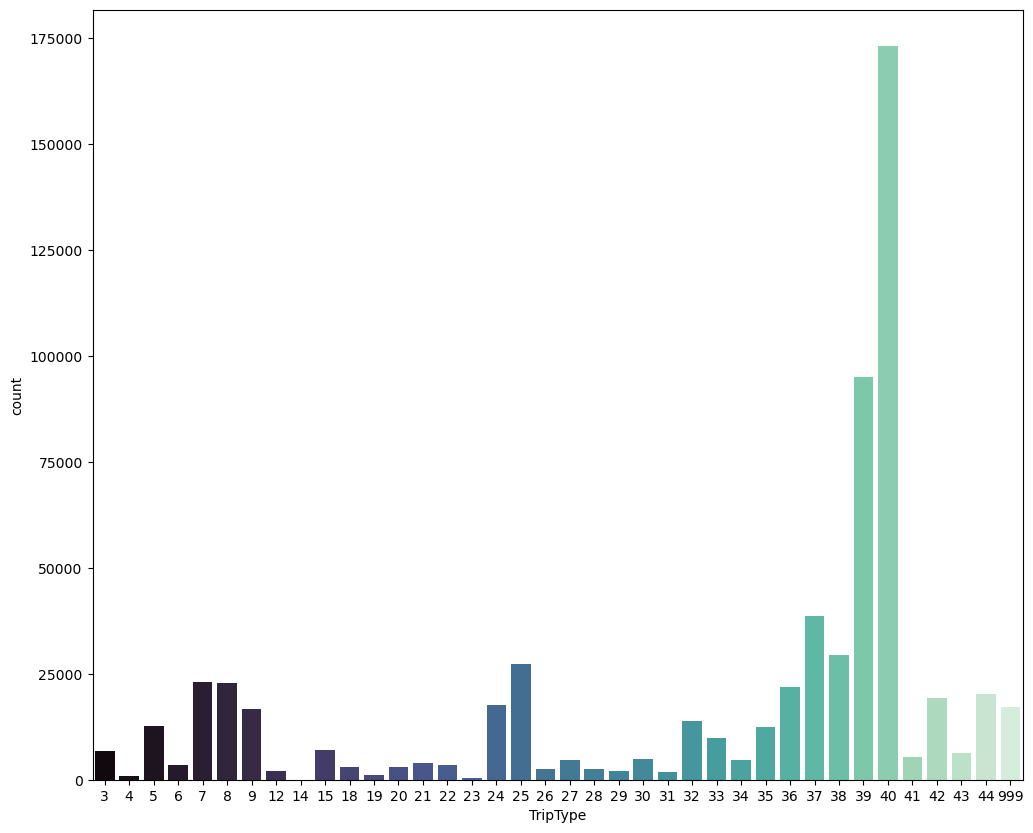

In [15]:
plt.figure(figsize= (12,10))
sns.countplot(x = 'TripType', data=df, palette='mako');

In [16]:
df.isnull().sum()

TripType                    0
VisitNumber                 0
Weekday                     0
Upc                      2878
ScanCount                   0
DepartmentDescription    1266
FinelineNumber           2878
dtype: int64

In [17]:
# ScanCount

In [18]:
df['ScanCount'].value_counts()

ScanCount
 1     556283
 2      52839
-1      14105
 3       9421
 4       4530
 5       1378
 6        865
-2        802
 8        246
 7        228
-3        142
 10       130
 9         88
-4         76
 12        60
 11        45
-5         16
 14        15
 13        13
 15        12
-6         10
 20         7
 16         6
 19         4
 18         4
 24         4
 23         3
 17         3
 25         3
 22         2
-9          2
 71         1
 51         1
 30         1
 31         1
-7          1
 46         1
-12         1
-10         1
Name: count, dtype: int64

In [19]:
# Finds all records of items that are duplicated based on visit and product details (marks both purchases and returns).
df.loc[df.duplicated(subset=['TripType', 'VisitNumber', 'Weekday', 'Upc', 'DepartmentDescription', 'FinelineNumber'], keep=False)]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
9,26,8,Friday,2.238400e+09,-1,PAINT AND ACCESSORIES,3565.0
11,26,8,Friday,8.867930e+10,2,PAINT AND ACCESSORIES,3504.0
14,26,8,Friday,8.867930e+10,-1,PAINT AND ACCESSORIES,3504.0
15,26,8,Friday,2.238400e+09,2,PAINT AND ACCESSORIES,3565.0
180,37,86,Friday,7.516665e+10,2,PRODUCE,7841.0
...,...,...,...,...,...,...,...
646845,40,191298,Sunday,6.811310e+10,1,BEAUTY,4541.0
646984,38,191337,Sunday,2.259120e+10,1,MEAT - FRESH & FROZEN,1301.0
646985,38,191337,Sunday,2.259120e+10,-1,MEAT - FRESH & FROZEN,1301.0
647004,38,191337,Sunday,2.261680e+10,-1,MEAT - FRESH & FROZEN,6405.0


In [20]:
# Groups records by item/visit and sums their 'ScanCount' to calculate the net quantity purchased.
df = df.groupby(['Upc', 'TripType', 'VisitNumber', 'Weekday',
            'DepartmentDescription', 'FinelineNumber'])['ScanCount'].sum().reset_index()

In [21]:
# Verifies the consolidation by checking for remaining duplicates; this should now be empty.
df.loc[df.duplicated(subset=['TripType', 'VisitNumber', 'Weekday',
                             'Upc', 'DepartmentDescription', 'FinelineNumber'], keep=False)]

,Upc,TripType,VisitNumber,Weekday,DepartmentDescription,FinelineNumber,ScanCount


In [22]:
# Removes records where the net ScanCount is zero (i.e., items that were fully returned).
df = df.loc[df['ScanCount'] != 0]

In [23]:
# VisitNumber

In [24]:
len(df['VisitNumber'].unique())

93086

In [25]:
# For each Visit_Number we calculated the number of UPC and then backtracked to the original rows.
df['unique_count'] = df.groupby('VisitNumber')['Upc'].transform('count')

In [26]:
df.head()

,Upc,TripType,VisitNumber,Weekday,DepartmentDescription,FinelineNumber,ScanCount,unique_count
0,834.0,39,134005,Friday,BAKERY,5016.0,1,12
2,834.0,40,127954,Thursday,BAKERY,5016.0,3,9
4,3035.0,8,26812,Tuesday,PRODUCE,2502.0,1,3
5,3035.0,8,136766,Friday,PRODUCE,2502.0,1,2
6,3035.0,8,180914,Saturday,PRODUCE,2502.0,1,3


<Axes: ylabel='Frequency'>

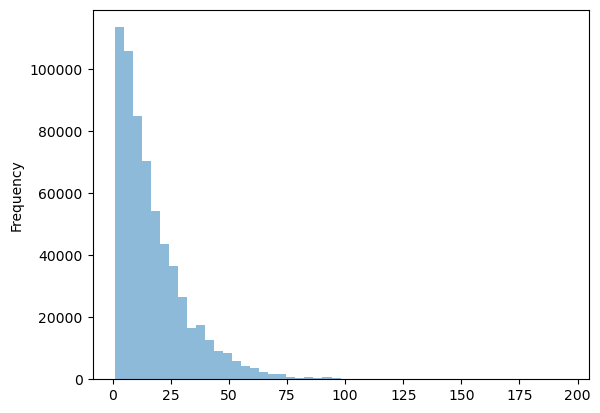

In [27]:
df['unique_count'].plot.hist(bins=50, alpha=0.5)

In [28]:
# Her 
df['item_sum'] = df.groupby('VisitNumber')['ScanCount'].transform('sum')

<Axes: ylabel='Frequency'>

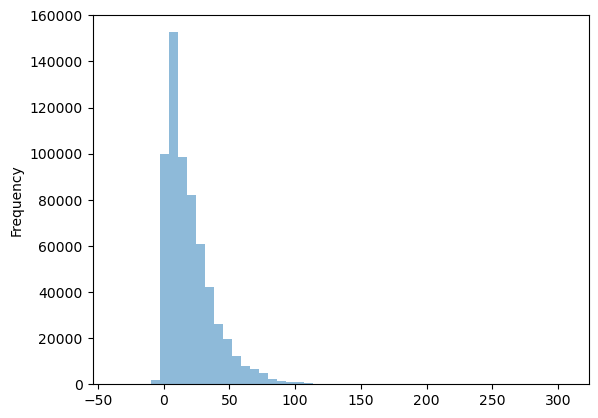

In [29]:
df['item_sum'].plot.hist(bins=50, alpha=0.5)

In [30]:
df["item_sum"].describe()

count    623469.000000
mean         20.121937
std          19.076134
min         -37.000000
25%           7.000000
50%          15.000000
75%          28.000000
max         306.000000
Name: item_sum, dtype: float64

In [31]:
# Weekday

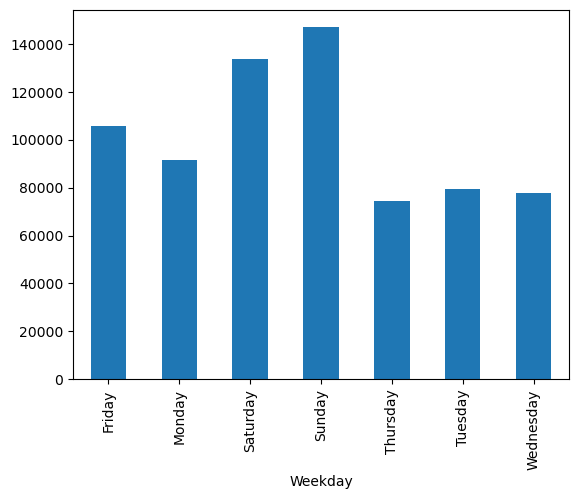

In [32]:
df.groupby(['Weekday'])['ScanCount'].sum().plot.bar();

In [33]:
# Department Description

In [34]:
len(df['DepartmentDescription'].unique())

68

In [35]:
df['DepartmentDescription'].value_counts().head(10)

DepartmentDescription
GROCERY DRY GOODS           69016
DSD GROCERY                 66342
PRODUCE                     49563
DAIRY                       43006
PERSONAL CARE               41232
IMPULSE MERCHANDISE         27791
HOUSEHOLD CHEMICALS/SUPP    24352
PHARMACY OTC                22772
FROZEN FOODS                20726
HOUSEHOLD PAPER GOODS       15963
Name: count, dtype: int64

In [36]:
df['DepartmentDescription'].value_counts().tail(10)

DepartmentDescription
1-HR PHOTO                337
MENSWEAR                  302
CAMERAS AND SUPPLIES      207
PHARMACY RX               143
OPTICAL - LENSES           85
LARGE HOUSEHOLD GOODS      77
CONCEPT STORES             35
OTHER DEPARTMENTS          29
SEASONAL                   29
HEALTH AND BEAUTY AIDS      2
Name: count, dtype: int64

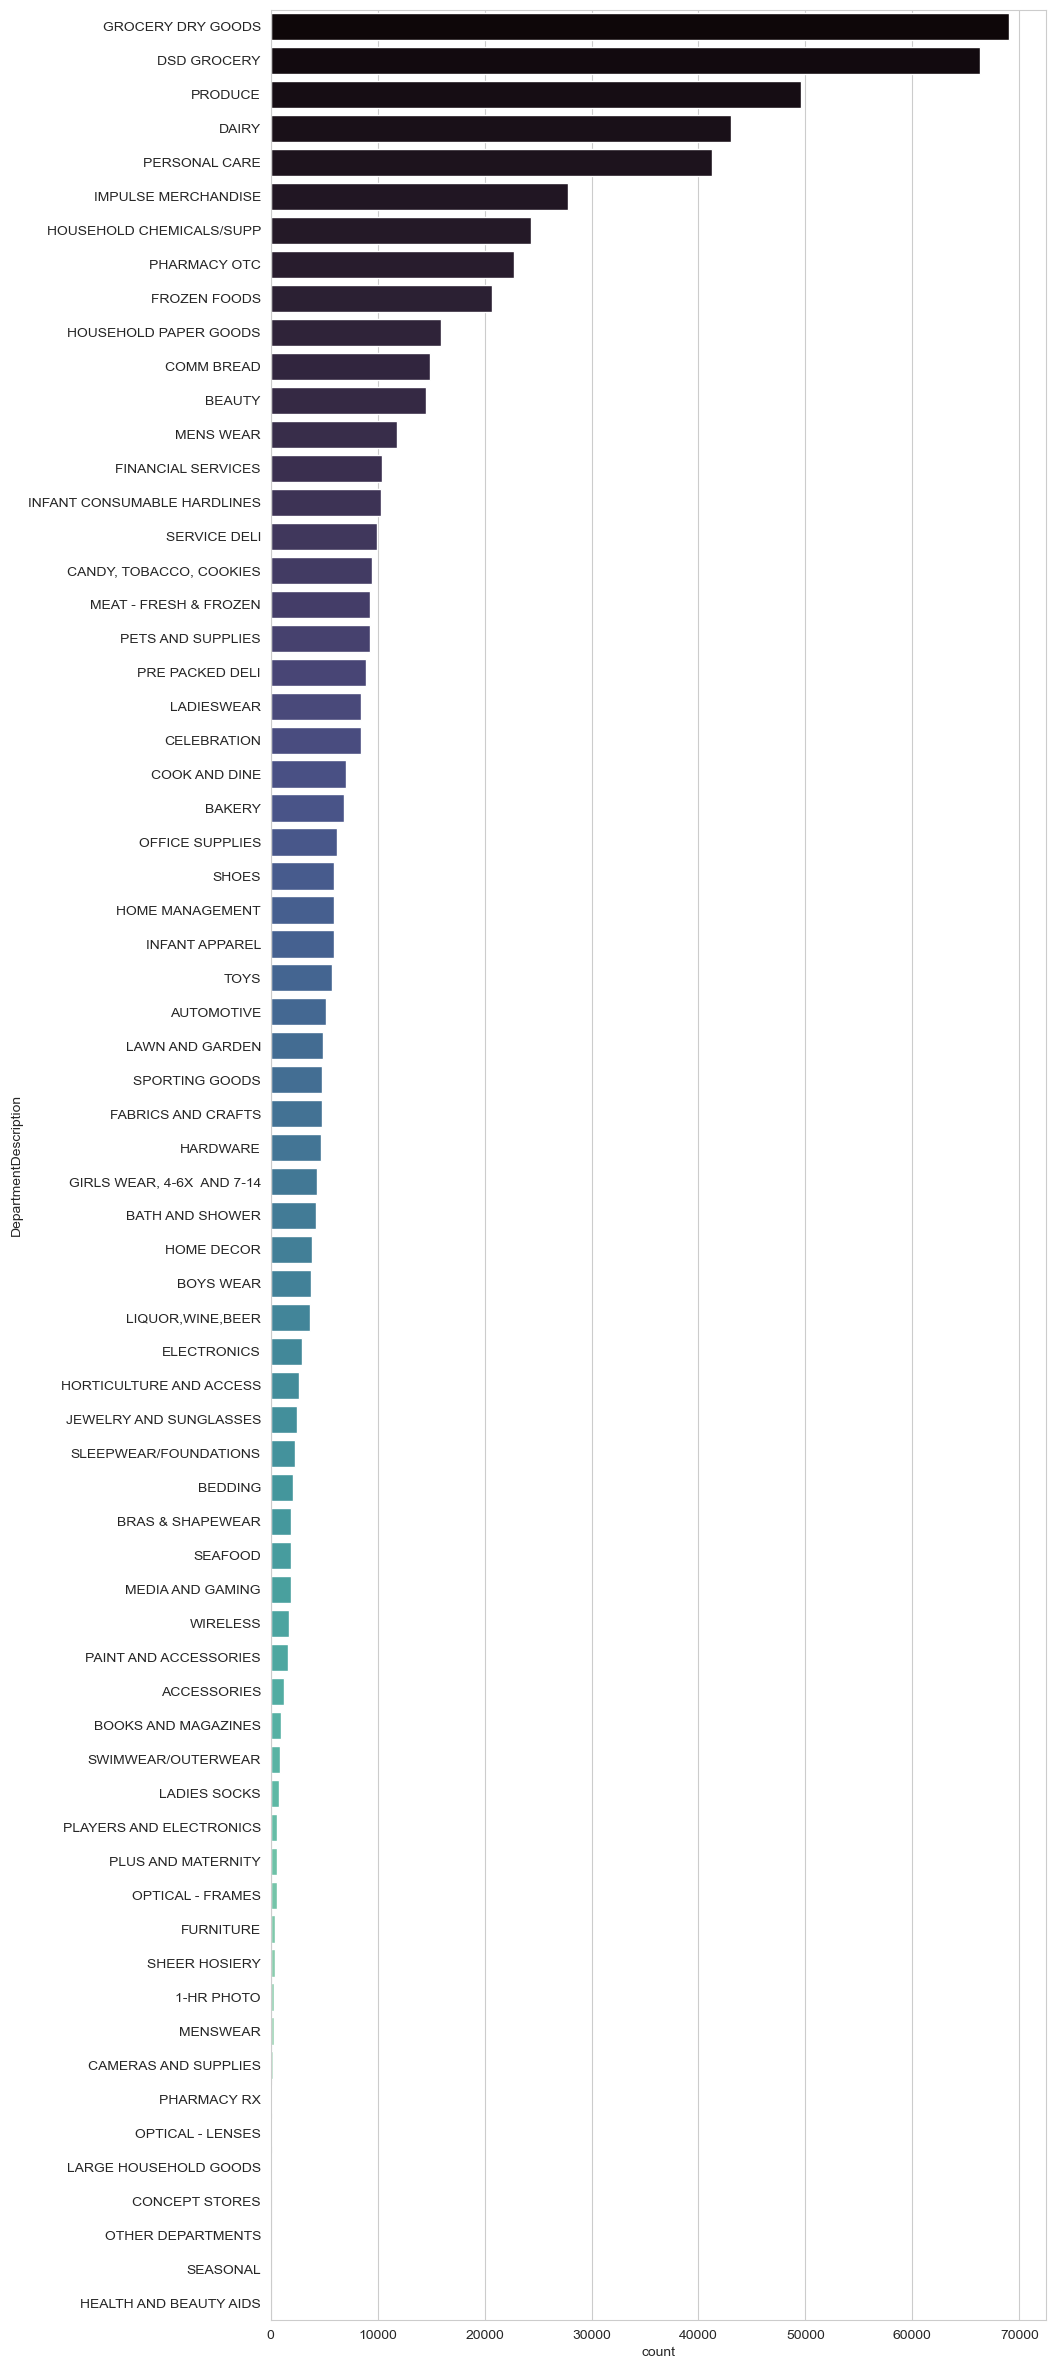

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 30))
ax = sns.countplot(y='DepartmentDescription', 
                   data=df, 
                   palette='mako', 
                   order=df['DepartmentDescription'].value_counts().index)

In [38]:
len(df['FinelineNumber'].unique())

5188

In [39]:
df['FinelineNumber'].value_counts()

FinelineNumber
5501.0    8150
1508.0    4904
135.0     4440
808.0     4331
0.0       3725
          ... 
6345.0       1
4314.0       1
7160.0       1
3430.0       1
7313.0       1
Name: count, Length: 5188, dtype: int64

In [40]:
df.groupby(['DepartmentDescription', 'FinelineNumber'])['ScanCount']\
.sum().reset_index().sort_values(by='ScanCount', ascending=False).head(10)

,DepartmentDescription,FinelineNumber,ScanCount
8666,PRODUCE,5501.0,8098
1859,DAIRY,1508.0,5623
4740,IMPULSE MERCHANDISE,808.0,4703
4713,IMPULSE MERCHANDISE,135.0,4634
2775,FINANCIAL SERVICES,0.0,3717
3339,GROCERY DRY GOODS,3120.0,3710
2113,DSD GROCERY,4606.0,3617
2250,DSD GROCERY,9546.0,3173
1839,DAIRY,1407.0,2947
4711,IMPULSE MERCHANDISE,115.0,2837


## Feature Engineering

In [41]:
df.head()

,Upc,TripType,VisitNumber,Weekday,DepartmentDescription,FinelineNumber,ScanCount,unique_count,item_sum
0,834.0,39,134005,Friday,BAKERY,5016.0,1,12,14
2,834.0,40,127954,Thursday,BAKERY,5016.0,3,9,12
4,3035.0,8,26812,Tuesday,PRODUCE,2502.0,1,3,3
5,3035.0,8,136766,Friday,PRODUCE,2502.0,1,2,2
6,3035.0,8,180914,Saturday,PRODUCE,2502.0,1,3,3


In [42]:
# Create a pivot table to convert departments into feature columns.
department_features = df.pivot_table(values='ScanCount',index='VisitNumber',
                                     columns='DepartmentDescription',
                                     aggfunc='sum',
                                     fill_value=0).reset_index()

In [43]:
# Clean up the column axis name inherited from the pivot operation.
department_features.columns.name = None

In [44]:
# Merge these new features back into the original 'df' DataFrame.
# A 'left' merge ensures that no rows from the original df are lost.
df = df.merge(department_features, on='VisitNumber', how='left')

In [45]:
df.head()

,Upc,TripType,VisitNumber,Weekday,DepartmentDescription,FinelineNumber,ScanCount,unique_count,item_sum,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,"CANDY, TOBACCO, COOKIES",CELEBRATION,COMM BREAD,CONCEPT STORES,COOK AND DINE,DAIRY,DSD GROCERY,ELECTRONICS,FABRICS AND CRAFTS,FINANCIAL SERVICES,FROZEN FOODS,FURNITURE,"GIRLS WEAR, 4-6X AND 7-14",GROCERY DRY GOODS,HARDWARE,HEALTH AND BEAUTY AIDS,HOME DECOR,HOME MANAGEMENT,HORTICULTURE AND ACCESS,HOUSEHOLD CHEMICALS/SUPP,HOUSEHOLD PAPER GOODS,IMPULSE MERCHANDISE,INFANT APPAREL,INFANT CONSUMABLE HARDLINES,JEWELRY AND SUNGLASSES,LADIES SOCKS,LADIESWEAR,LARGE HOUSEHOLD GOODS,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEAT - FRESH & FROZEN,MEDIA AND GAMING,MENS WEAR,MENSWEAR,OFFICE SUPPLIES,OPTICAL - FRAMES,OPTICAL - LENSES,OTHER DEPARTMENTS,PAINT AND ACCESSORIES,PERSONAL CARE,PETS AND SUPPLIES,PHARMACY OTC,PHARMACY RX,PLAYERS AND ELECTRONICS,PLUS AND MATERNITY,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,834.0,39,134005,Friday,BAKERY,5016.0,1,12,14,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0
1,834.0,40,127954,Thursday,BAKERY,5016.0,3,9,12,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0
2,3035.0,8,26812,Tuesday,PRODUCE,2502.0,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0
3,3035.0,8,136766,Friday,PRODUCE,2502.0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
4,3035.0,8,180914,Saturday,PRODUCE,2502.0,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0


In [46]:
day_of_week = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}

In [47]:
# This creates a new column with the numerical representation of the day.
df['weekday_num'] = df['Weekday'].map(day_of_week)

In [48]:
df.head()

,Upc,TripType,VisitNumber,Weekday,DepartmentDescription,FinelineNumber,ScanCount,unique_count,item_sum,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,"CANDY, TOBACCO, COOKIES",CELEBRATION,COMM BREAD,CONCEPT STORES,COOK AND DINE,DAIRY,DSD GROCERY,ELECTRONICS,FABRICS AND CRAFTS,FINANCIAL SERVICES,FROZEN FOODS,FURNITURE,"GIRLS WEAR, 4-6X AND 7-14",GROCERY DRY GOODS,HARDWARE,HEALTH AND BEAUTY AIDS,HOME DECOR,HOME MANAGEMENT,HORTICULTURE AND ACCESS,HOUSEHOLD CHEMICALS/SUPP,HOUSEHOLD PAPER GOODS,IMPULSE MERCHANDISE,INFANT APPAREL,INFANT CONSUMABLE HARDLINES,JEWELRY AND SUNGLASSES,LADIES SOCKS,LADIESWEAR,LARGE HOUSEHOLD GOODS,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEAT - FRESH & FROZEN,MEDIA AND GAMING,MENS WEAR,MENSWEAR,OFFICE SUPPLIES,OPTICAL - FRAMES,OPTICAL - LENSES,OTHER DEPARTMENTS,PAINT AND ACCESSORIES,PERSONAL CARE,PETS AND SUPPLIES,PHARMACY OTC,PHARMACY RX,PLAYERS AND ELECTRONICS,PLUS AND MATERNITY,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,weekday_num
0,834.0,39,134005,Friday,BAKERY,5016.0,1,12,14,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,4
1,834.0,40,127954,Thursday,BAKERY,5016.0,3,9,12,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,3
2,3035.0,8,26812,Tuesday,PRODUCE,2502.0,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1
3,3035.0,8,136766,Friday,PRODUCE,2502.0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,4
4,3035.0,8,180914,Saturday,PRODUCE,2502.0,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,5


In [49]:
df = df.drop('Weekday', axis=1)

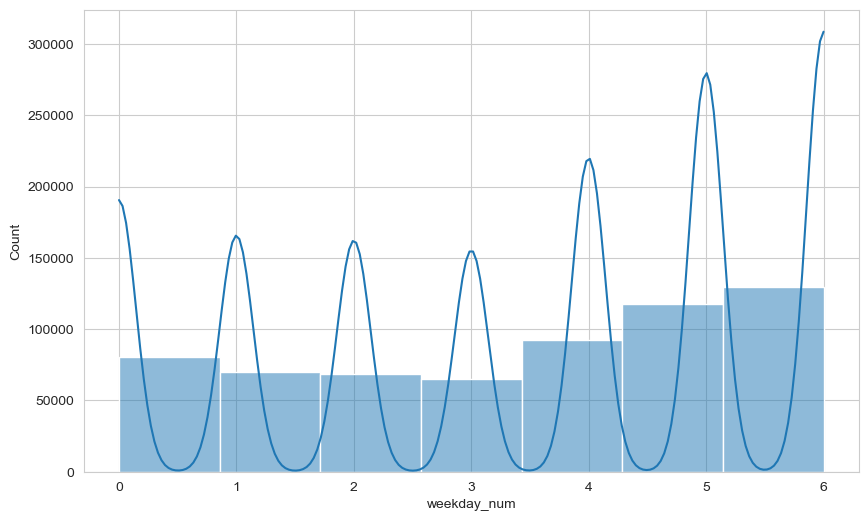

In [50]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x='weekday_num', kde=True, ax=ax, bins=7)
tick_positions = list(range(7))
tick_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [51]:
import numpy as np

In [52]:
df['sin_day'] = np.sin(2 * np.pi * df['weekday_num'] / 7)
df['cos_day'] = np.cos(2 * np.pi * df['weekday_num'] / 7)

In [53]:
df = df.drop('weekday_num', axis=1)

In [54]:
df.head()

,Upc,TripType,VisitNumber,DepartmentDescription,FinelineNumber,ScanCount,unique_count,item_sum,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,"CANDY, TOBACCO, COOKIES",CELEBRATION,COMM BREAD,CONCEPT STORES,COOK AND DINE,DAIRY,DSD GROCERY,ELECTRONICS,FABRICS AND CRAFTS,FINANCIAL SERVICES,FROZEN FOODS,FURNITURE,"GIRLS WEAR, 4-6X AND 7-14",GROCERY DRY GOODS,HARDWARE,HEALTH AND BEAUTY AIDS,HOME DECOR,HOME MANAGEMENT,HORTICULTURE AND ACCESS,HOUSEHOLD CHEMICALS/SUPP,HOUSEHOLD PAPER GOODS,IMPULSE MERCHANDISE,INFANT APPAREL,INFANT CONSUMABLE HARDLINES,JEWELRY AND SUNGLASSES,LADIES SOCKS,LADIESWEAR,LARGE HOUSEHOLD GOODS,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEAT - FRESH & FROZEN,MEDIA AND GAMING,MENS WEAR,MENSWEAR,OFFICE SUPPLIES,OPTICAL - FRAMES,OPTICAL - LENSES,OTHER DEPARTMENTS,PAINT AND ACCESSORIES,PERSONAL CARE,PETS AND SUPPLIES,PHARMACY OTC,PHARMACY RX,PLAYERS AND ELECTRONICS,PLUS AND MATERNITY,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,sin_day,cos_day
0,834.0,39,134005,BAKERY,5016.0,1,12,14,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,-0.433884,-0.900969
1,834.0,40,127954,BAKERY,5016.0,3,9,12,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0.433884,-0.900969
2,3035.0,8,26812,PRODUCE,2502.0,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0.781831,0.623490
3,3035.0,8,136766,PRODUCE,2502.0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,-0.433884,-0.900969
4,3035.0,8,180914,PRODUCE,2502.0,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,-0.974928,-0.222521


In [55]:
df.loc[df['TripType'] == 39].head(5)

,Upc,TripType,VisitNumber,DepartmentDescription,FinelineNumber,ScanCount,unique_count,item_sum,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,"CANDY, TOBACCO, COOKIES",CELEBRATION,COMM BREAD,CONCEPT STORES,COOK AND DINE,DAIRY,DSD GROCERY,ELECTRONICS,FABRICS AND CRAFTS,FINANCIAL SERVICES,FROZEN FOODS,FURNITURE,"GIRLS WEAR, 4-6X AND 7-14",GROCERY DRY GOODS,HARDWARE,HEALTH AND BEAUTY AIDS,HOME DECOR,HOME MANAGEMENT,HORTICULTURE AND ACCESS,HOUSEHOLD CHEMICALS/SUPP,HOUSEHOLD PAPER GOODS,IMPULSE MERCHANDISE,INFANT APPAREL,INFANT CONSUMABLE HARDLINES,JEWELRY AND SUNGLASSES,LADIES SOCKS,LADIESWEAR,LARGE HOUSEHOLD GOODS,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEAT - FRESH & FROZEN,MEDIA AND GAMING,MENS WEAR,MENSWEAR,OFFICE SUPPLIES,OPTICAL - FRAMES,OPTICAL - LENSES,OTHER DEPARTMENTS,PAINT AND ACCESSORIES,PERSONAL CARE,PETS AND SUPPLIES,PHARMACY OTC,PHARMACY RX,PLAYERS AND ELECTRONICS,PLUS AND MATERNITY,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,sin_day,cos_day
0,834.0,39,134005,BAKERY,5016.0,1,12,14,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,-0.433884,-0.900969
31,3035.0,39,113741,PRODUCE,2502.0,1,8,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0.781831,0.623490
32,3035.0,39,122747,PRODUCE,2502.0,1,11,11,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0.974928,-0.222521
33,3035.0,39,124905,PRODUCE,2502.0,1,15,15,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0.433884,-0.900969
34,3035.0,39,130368,PRODUCE,2502.0,1,10,10,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0.433884,-0.900969


In [56]:
df.loc[df['TripType'] == 40].head(5)

,Upc,TripType,VisitNumber,DepartmentDescription,FinelineNumber,ScanCount,unique_count,item_sum,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,"CANDY, TOBACCO, COOKIES",CELEBRATION,COMM BREAD,CONCEPT STORES,COOK AND DINE,DAIRY,DSD GROCERY,ELECTRONICS,FABRICS AND CRAFTS,FINANCIAL SERVICES,FROZEN FOODS,FURNITURE,"GIRLS WEAR, 4-6X AND 7-14",GROCERY DRY GOODS,HARDWARE,HEALTH AND BEAUTY AIDS,HOME DECOR,HOME MANAGEMENT,HORTICULTURE AND ACCESS,HOUSEHOLD CHEMICALS/SUPP,HOUSEHOLD PAPER GOODS,IMPULSE MERCHANDISE,INFANT APPAREL,INFANT CONSUMABLE HARDLINES,JEWELRY AND SUNGLASSES,LADIES SOCKS,LADIESWEAR,LARGE HOUSEHOLD GOODS,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEAT - FRESH & FROZEN,MEDIA AND GAMING,MENS WEAR,MENSWEAR,OFFICE SUPPLIES,OPTICAL - FRAMES,OPTICAL - LENSES,OTHER DEPARTMENTS,PAINT AND ACCESSORIES,PERSONAL CARE,PETS AND SUPPLIES,PHARMACY OTC,PHARMACY RX,PLAYERS AND ELECTRONICS,PLUS AND MATERNITY,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,sin_day,cos_day
1,834.0,40,127954,BAKERY,5016.0,3,9,12,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0.433884,-0.900969
42,3035.0,40,106013,PRODUCE,2502.0,1,28,33,0,0,0,3,0,0,0,0,0,0,0,0,0,3,0,0,6,5,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9,0,0,0,0,0,0,0,0,0,0,-0.781831,0.623490
43,3035.0,40,106462,PRODUCE,2502.0,1,51,57,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,9,8,0,0,0,0,0,0,21,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11,0,0,2,0,0,0,0,0,0,0,-0.781831,0.623490
44,3035.0,40,111417,PRODUCE,2502.0,1,64,72,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,11,8,0,0,0,4,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,13,3,0,2,0,0,0,0,0,0,0,0.000000,1.000000
45,3035.0,40,116166,PRODUCE,2502.0,1,26,26,0,0,1,1,0,0,0,0,0,0,0,3,0,1,0,0,2,4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,2,4,0,0,1,0,0,0,0,0,0,0,0.781831,0.623490


In [57]:
df.loc[df['TripType'] == 5].head(5)

,Upc,TripType,VisitNumber,DepartmentDescription,FinelineNumber,ScanCount,unique_count,item_sum,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,"CANDY, TOBACCO, COOKIES",CELEBRATION,COMM BREAD,CONCEPT STORES,COOK AND DINE,DAIRY,DSD GROCERY,ELECTRONICS,FABRICS AND CRAFTS,FINANCIAL SERVICES,FROZEN FOODS,FURNITURE,"GIRLS WEAR, 4-6X AND 7-14",GROCERY DRY GOODS,HARDWARE,HEALTH AND BEAUTY AIDS,HOME DECOR,HOME MANAGEMENT,HORTICULTURE AND ACCESS,HOUSEHOLD CHEMICALS/SUPP,HOUSEHOLD PAPER GOODS,IMPULSE MERCHANDISE,INFANT APPAREL,INFANT CONSUMABLE HARDLINES,JEWELRY AND SUNGLASSES,LADIES SOCKS,LADIESWEAR,LARGE HOUSEHOLD GOODS,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEAT - FRESH & FROZEN,MEDIA AND GAMING,MENS WEAR,MENSWEAR,OFFICE SUPPLIES,OPTICAL - FRAMES,OPTICAL - LENSES,OTHER DEPARTMENTS,PAINT AND ACCESSORIES,PERSONAL CARE,PETS AND SUPPLIES,PHARMACY OTC,PHARMACY RX,PLAYERS AND ELECTRONICS,PLUS AND MATERNITY,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,sin_day,cos_day
64,3082.0,5,67616,PRODUCE,8400.0,1,7,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,1.000000
479,3107.0,5,687,PRODUCE,103.0,1,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,-0.433884,-0.900969
480,3107.0,5,29246,PRODUCE,103.0,1,5,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.781831,0.623490
481,3107.0,5,36105,PRODUCE,103.0,1,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0.974928,-0.222521
482,3107.0,5,39662,PRODUCE,103.0,1,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0.433884,-0.900969


## Modelling

In [72]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import log_loss

In [59]:
df = df.drop_duplicates(subset='VisitNumber')

In [60]:
y = df['TripType']

In [61]:
le = LabelEncoder()
y = le.fit_transform(y)

In [67]:
x = df.drop(columns=['TripType', 'VisitNumber', 'Upc', 'FinelineNumber', 'ScanCount','DepartmentDescription'])

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [69]:
xgb = XGBClassifier()

In [70]:
xgb.fit(x_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [75]:
tahmin = xgb.predict_proba(x_test)

In [76]:
log_loss(y_test, tahmin)

0.9356590228302831

##  Conclusion

In this project, an `XGBClassifier` model was successfully developed to classify 38 different shopping trip types (`TripType`) using Walmart customer shopping data. During the data preparation phase, important features were created by accounting for product returns, such as the net item sum per visit (`item_sum`), the total item count (`unique_count`), and cyclical features for the days of the week (`sin_dy`, `cos_dy`).

The model was trained on 80% of the dataset and evaluated on the remaining 20% hold-out test set. On this test data, the model achieved a **log_loss score of approximately 0.94**. This result provides a strong baseline performance, demonstrating that the engineered features are effective in distinguishing between the different trip types.  

For future improvements, it is recommended to incorporate department information into the model and to perform hyperparameter tuning.
